# 4 - Existe uma diferença na performance de vendas por categoria de produto em diferentes estados ou regiões?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_pedidos = pd.read_csv(r'C:\Users\55119\OneDrive\Área de Trabalho\REPROGRAMA (On33)\Semana14\on33-python-s14-analise-de-dados\material\dados\olist_orders_dataset.csv')

In [4]:
df_produtos = pd.read_csv(r'C:\Users\55119\OneDrive\Área de Trabalho\REPROGRAMA (On33)\Semana14\on33-python-s14-analise-de-dados\material\dados\olist_products_dataset.csv')

In [5]:
df_clientes = pd.read_csv(r'C:\Users\55119\OneDrive\Área de Trabalho\REPROGRAMA (On33)\Semana14\on33-python-s14-analise-de-dados\material\dados\olist_customers_dataset.csv')

In [6]:
df_localidade = pd.read_csv(r'C:\Users\55119\OneDrive\Área de Trabalho\REPROGRAMA (On33)\Semana14\on33-python-s14-analise-de-dados\material\dados\olist_geolocation_dataset.csv')
df_localidade.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [7]:
df_itens_pedido = pd.read_csv(r'C:\Users\55119\OneDrive\Área de Trabalho\REPROGRAMA (On33)\Semana14\on33-python-s14-analise-de-dados\material\dados\olist_order_items_dataset.csv')

In [8]:
# Verificar colunas
df_localidade.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [9]:
df_clientes.columns


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [10]:
df_itens_pedido.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [11]:
df_pedidos.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [12]:
df_produtos.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [13]:
# Juntar as bases de dados
dados_juntos = df_pedidos.merge(df_itens_pedido, on='order_id')
dados_juntos = dados_juntos.merge(df_produtos, on='product_id')
dados_juntos = dados_juntos.merge(df_clientes, on='customer_id')
dados_juntos = dados_juntos.merge(df_localidade, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

In [14]:
# Agrupar por categoria de produto e estado
agrupar = dados_juntos.groupby(['product_category_name', 'geolocation_state']).agg({'order_id': 'count'}).reset_index()

In [15]:
agrupar.columns

Index(['product_category_name', 'geolocation_state', 'order_id'], dtype='object')

In [16]:
# Renomear coluna
agrupar.rename(columns={
    'order_id': 'quantidade_vendas',
    'product_category_name': 'categoria_produto',
    'geolocation_state': 'localidade_estado'
    }, inplace=True)

In [17]:
agrupar.columns

Index(['categoria_produto', 'localidade_estado', 'quantidade_vendas'], dtype='object')

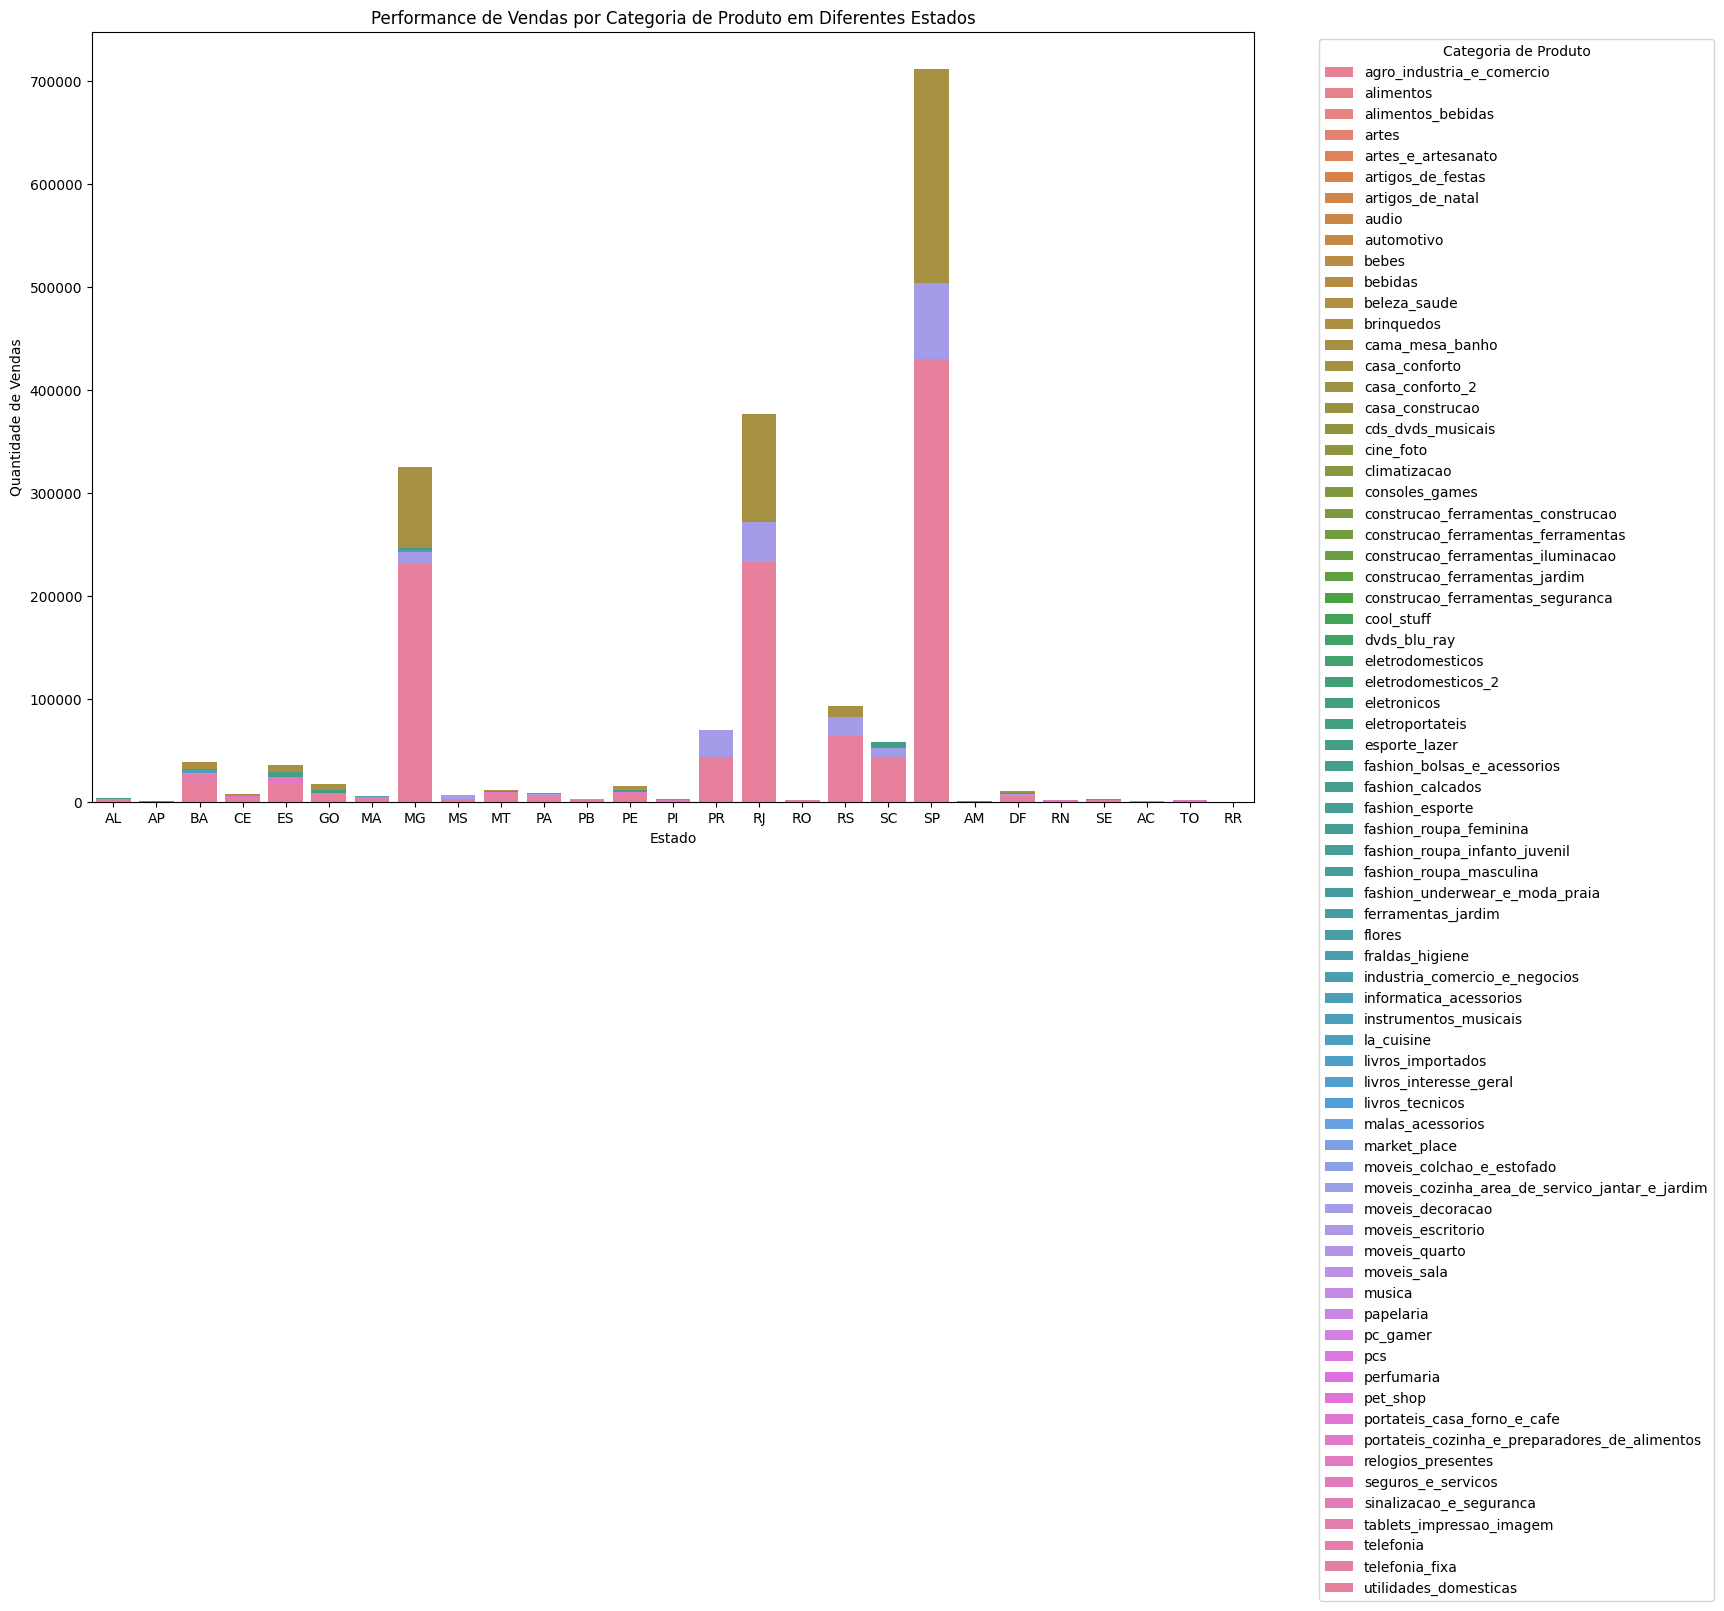

In [18]:
plt.figure(figsize=(15, 10))
sns.barplot(data=agrupar, x='localidade_estado', y='quantidade_vendas', hue='categoria_produto', dodge=False) #dodge=False faz com que as barras de diferentes categorias sejam empilhadas em vez de colocadas lado a lado.
plt.title('Performance de Vendas por Categoria de Produto em Diferentes Estados')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Vendas')
plt.legend(title='Categoria de Produto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()